In [1]:
import torch
import torch.nn as nn
from collections import Counter
from model import RNN
import matplotlib.pyplot as plt

(array([262., 969., 592., 427., 172., 127.,  61.,  19.,  20.,   6.,   5.,
          2.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ,
        39.6, 43.2, 46.8, 50.4, 54. , 57.6, 61.2, 64.8, 68.4, 72. ]),
 <a list of 20 Patch objects>)

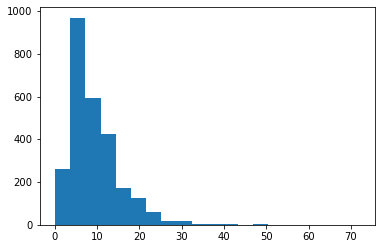

In [2]:
f = open("../preprocess/cleaned.txt", "r", encoding="utf8")
text = f.read()
sentences = text.split("।")
words = []
sens_len = []
for s in sentences:
    w_s = s.split()
    sens_len.append(len(w_s))
    
    for w in s.split():
        words.append(w)
plt.hist(sens_len,20)

In [3]:
vocab_counter = Counter(words)
threshold = 3
vocab = ["<UNK>"]+[w for (w, c) in vocab_counter.most_common() if c >= threshold]

In [4]:
vocab_len = len(vocab)

In [5]:
max_len = 30

In [6]:
def tensor_from_sentences(sentences,vocab, max_len=30):
    X = []
    Y = []
    vocab_len = len(vocab)
    for s in sentences:
        w_s = s.split()
#         print(w_s)
        idx_ip = [vocab.index(w) if w in vocab else 0 for w in w_s]
        len_words = len(idx_ip)
        
        if len_words < max_len:
            pad = [0] * (max_len - len_words)
            idx_ip += pad
        else :
            idx_ip = idx_ip[:max_len]
        
        idx_op = idx_ip[1:] + [0]
        one_hot = []
        for idx in idx_op:
            hot = [0] * vocab_len
            hot[idx] = 1
            one_hot.append(hot)
        
        X.append(idx_ip)
        Y.append(one_hot)
        
    return X,Y

X, Y = tensor_from_sentences(sentences, vocab, max_len)

In [7]:
def batchify(X,Y,batch_size):
    batches_X = []
    batches_Y = []
    len_data = len(X)
    for start in range(0,len_data,batch_size):
        end  = None
        if start + batch_size < len_data:
            end = start + batch_size
        else:
            end = len_data
            
        x = torch.tensor(X[start:end], dtype=torch.long)
        y = torch.tensor(Y[start:end], dtype=torch.float)
        
        batches_X.append(x)
        batches_Y.append(y)
    
    return batches_X, batches_Y

batches_X, batches_Y = batchify(X,Y, batch_size=20)

In [8]:
model = RNN(vocab_len,1000,vocab_len,2)

In [9]:

def train(model, optimizer, criterion, epochs, train_X, train_Y):
    for e in range(epochs):
        train_loss = 0
#         train_acc = 0

#         test_loss = 0
#         test_acc = 0
        
        for i in range(len(train_X)):
            x = train_X[i]
            y = train_Y[i]
            optimizer.zero_grad()
            prediction, hidden = model(x)
#             print(type(prediction))
            loss = criterion(prediction,y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.data.item()
#             train_acc += torch.eq(prediction.round(),y).sum().item()
        train_loss /= len(train_X)
#         train_acc /= len(train_X)
        print("Epoch {} Train Loss: {}".format(e+1, train_loss))

#         for i in range(len(test_X)):
#             x = test_X[i].to(device)
#             y = test_Y[i:i+1].to(device)
#             y = y.float()
#             prediction = model(x)
#             prediction = prediction.squeeze(1)
#             loss = criterion(prediction,y)

#             test_loss += loss.data.item()
#             test_acc += torch.eq(prediction.round(),y).sum().item()
#         test_loss /= len(test_X)
#         test_acc /= len(test_X)

#         if (e+1)%10 == 0:
#             torch.save(model, "/content/drive/My Drive/models/SA_LSTM/model/e_" + str(e+1)+".bin")
#         print("Epoch: {}  Training (loss,acc): ({},{})  Test (loss, acc):({},{})".format( e+1, train_loss, train_acc, test_loss, test_acc))

In [10]:
optimizer = torch.optim.Adam(model.parameters())
loss_fuction = nn.KLDivLoss()
train(model,optimizer,loss_fuction,1, batches_X,batches_Y)

C:\Users\mnsdk\miniconda3\lib\site-packages\torch\nn\functional.py:1958: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


Epoch 0 Train Loss: 0.0009904016374433135


In [ ]:
def count_parameters(model):
      return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)